In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [58]:
df = pd.read_csv("Synthetic Financial Datasets.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [60]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [61]:
del df['nameOrig']
del df['nameDest']
del df['isFlaggedFraud']

df['frauddummy']=np.where(df['isFraud']==0,"no","yes")

In [62]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,frauddummy
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,no
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,no
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,yes
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,yes
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,no


<Axes: xlabel='step', ylabel='Count'>

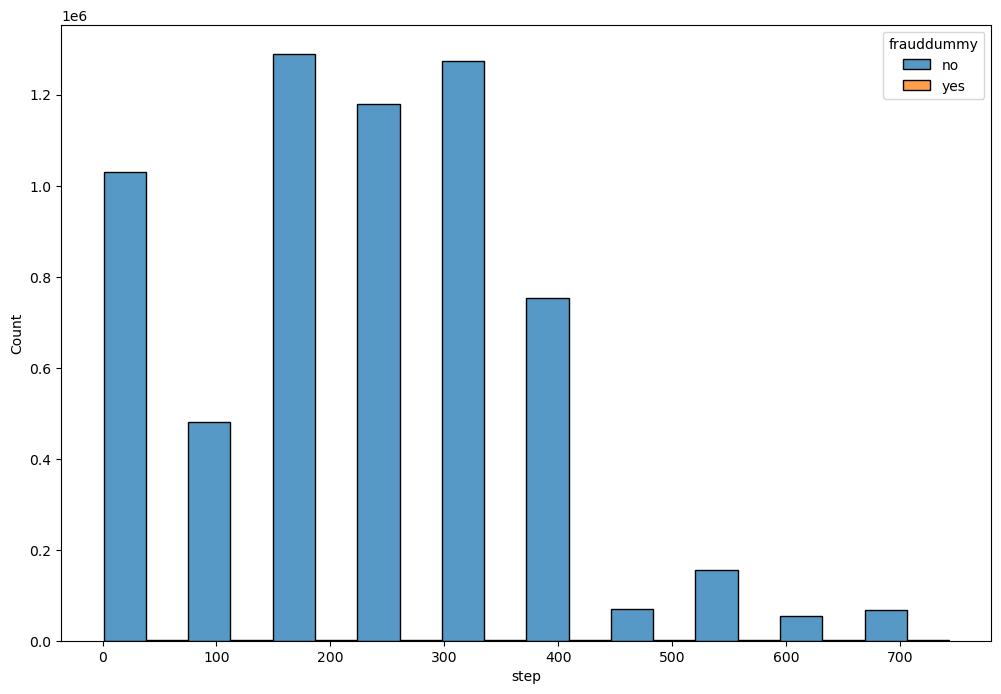

In [63]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="step", hue="frauddummy", multiple="dodge", bins=10)

<Axes: xlabel='type', ylabel='Count'>

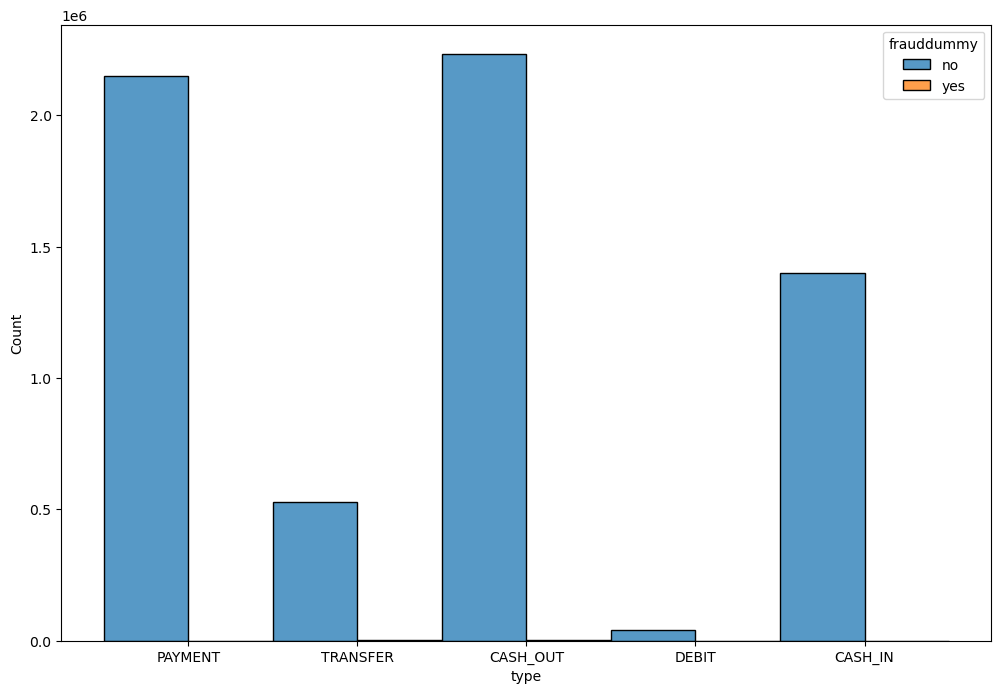

In [64]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="type", hue="frauddummy", multiple="dodge", bins=5)

<Axes: xlabel='frauddummy', ylabel='count'>

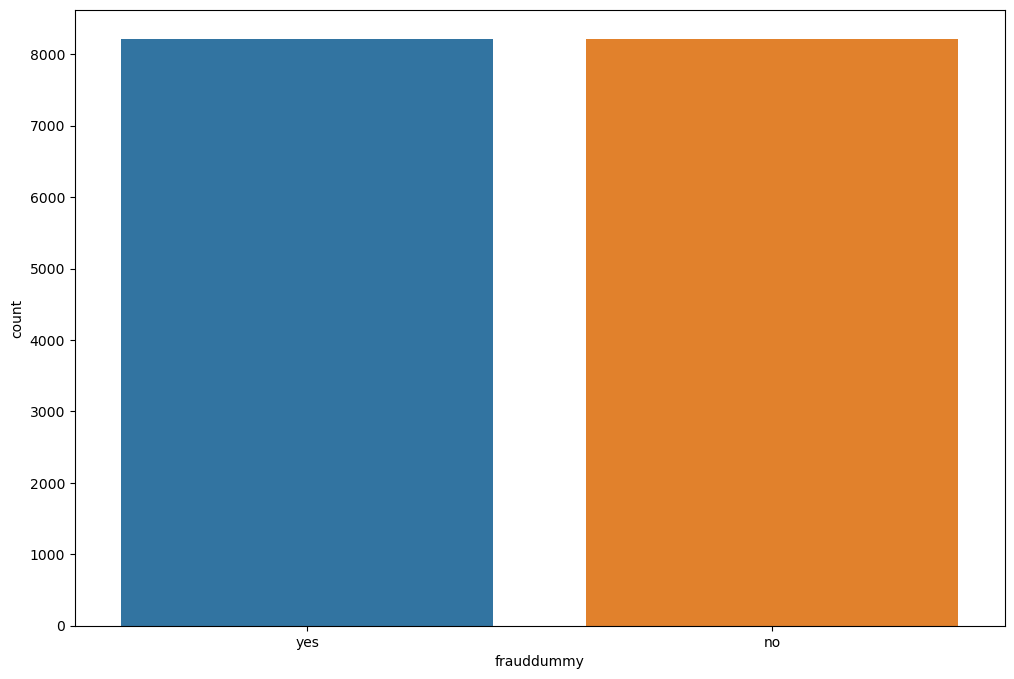

In [65]:
# count the number of fraud and non-fraud cases
fraud_cases = df[df["isFraud"] == 1]
non_fraud_cases = df[df["isFraud"] == 0]

# determine the size of the smaller class
n_samples = min(len(fraud_cases), len(non_fraud_cases))

# randomly sample n_samples from the majority class
non_fraud_cases_downsampled = non_fraud_cases.sample(n=n_samples, random_state=42)

# combine the downsampled majority class with the minority class
df_downsampled = pd.concat([fraud_cases, non_fraud_cases_downsampled])

# plot the distribution of fraud and non-fraud cases in the downsampled dataset
plt.figure(figsize=(12,8))
sns.countplot(data=df_downsampled, x="frauddummy")

<Axes: xlabel='step', ylabel='Count'>

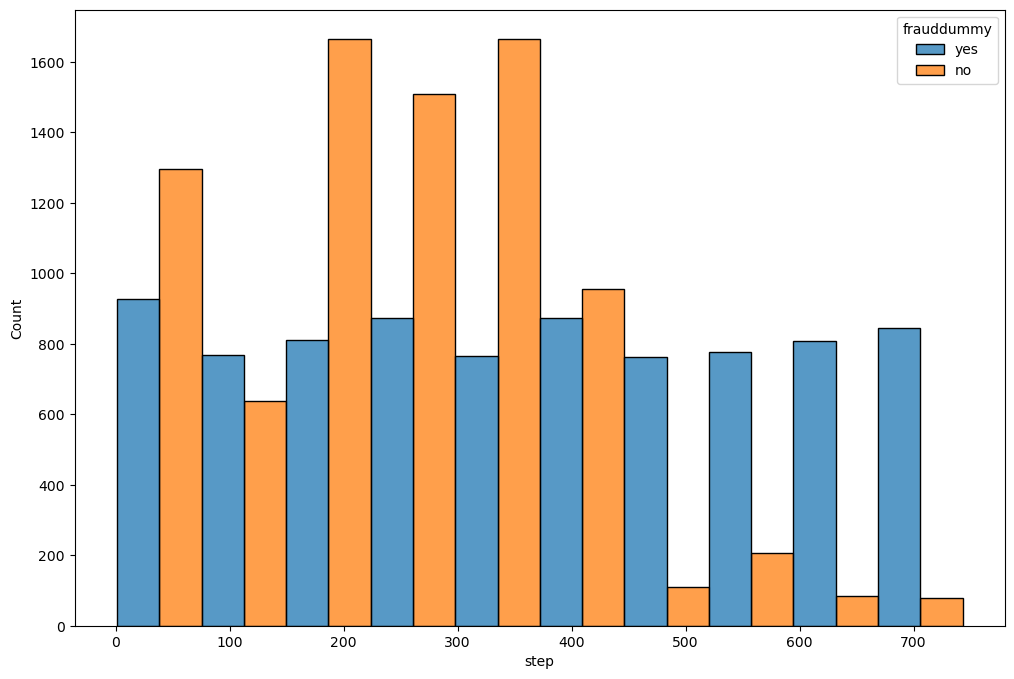

In [66]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_downsampled, x="step", hue="frauddummy", multiple="dodge", bins=10)

<Axes: xlabel='type', ylabel='Count'>

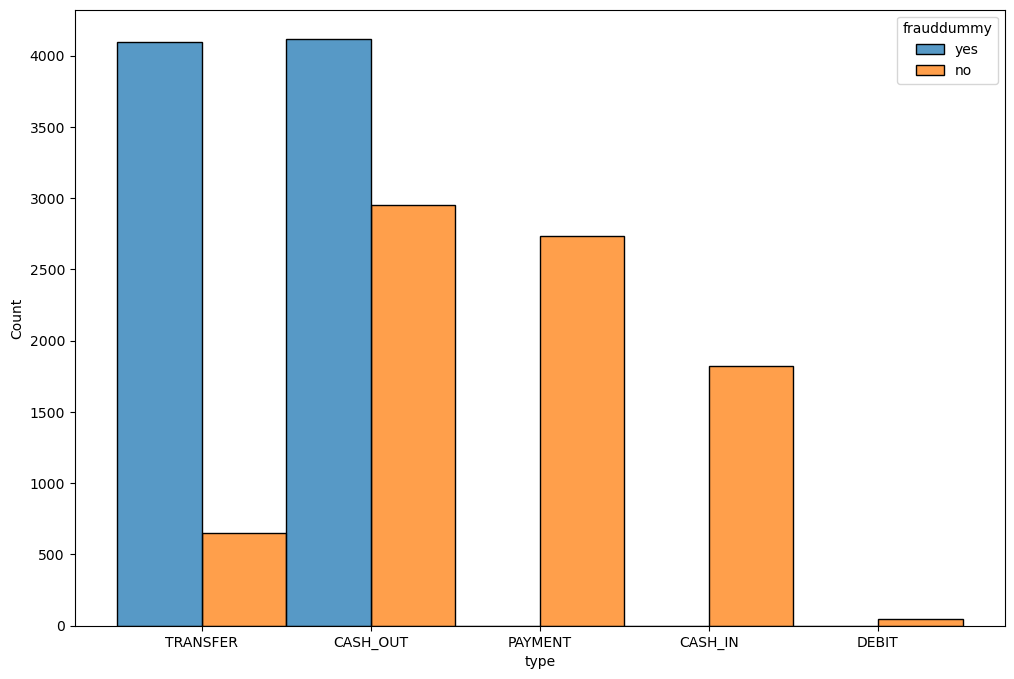

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_downsampled, x="type", hue="frauddummy", multiple="dodge", bins=5)

In [68]:
#Facotr the object variable to numerical values for modelling
df_downsampled['type'], _ = pd.factorize(df_downsampled['type'], sort=True)
df_downsampled['frauddummy'], _ = pd.factorize(df_downsampled['frauddummy'], sort=True)
del df_downsampled["isFraud"]
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 2 to 4712423
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   frauddummy      16426 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.1 MB


Text(0.5, 1.0, 'Correlation Heatmap')

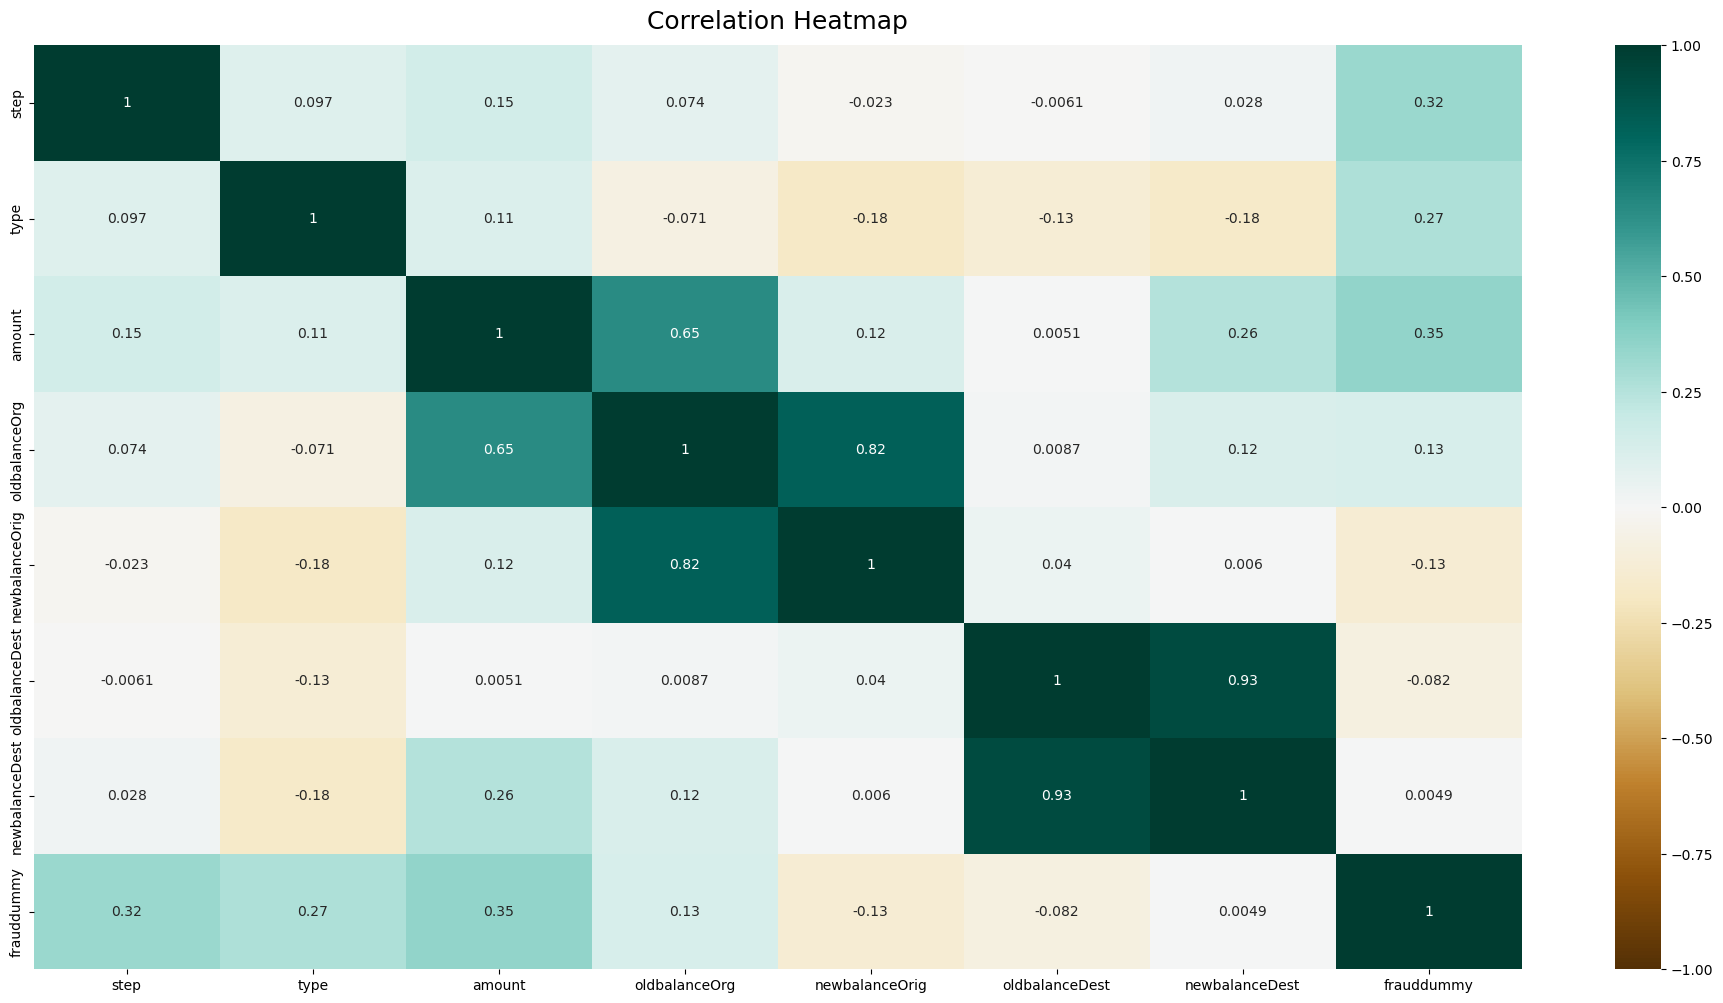

In [69]:
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(df_downsampled.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [70]:
X = df_downsampled.drop('frauddummy',axis = 1)
y = df_downsampled.loc[:,'frauddummy']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print(f"Length of the Dataset:, {len(X)}")
print(f"Length of the Training Dataset:, {len(X_train)}")
print(f"Length of the Training Dataset responese:, {len(y_train)}")
print(f"Length of the Test Dataset:, {len(X_test)}")

Length of the Dataset:, 16426
Length of the Training Dataset:, 13140
Length of the Training Dataset responese:, 13140
Length of the Test Dataset:, 3286


C:\Users\Qixuan\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Qixuan\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


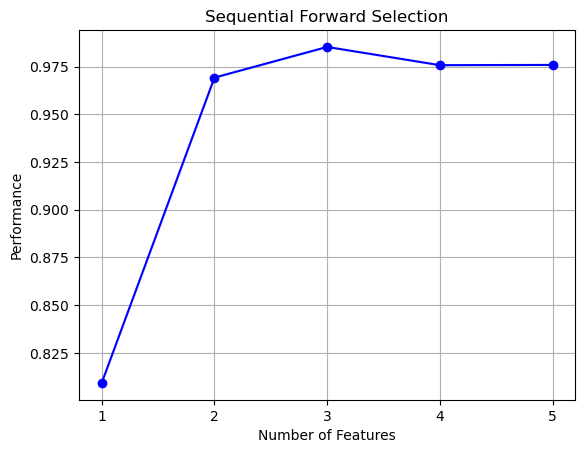

('amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest')

In [71]:
#forward selection
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'roc_auc',
          cv = 0)
sfs.fit(X_train, y_train)
plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()
sfs.k_feature_names_

C:\Users\Qixuan\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Qixuan\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


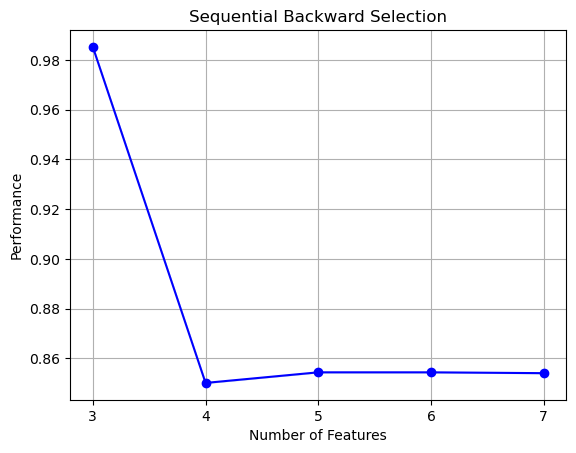

('amount', 'oldbalanceOrg', 'newbalanceOrig')

In [72]:
#backward selection
sbs = SFS(LinearRegression(),
          k_features=3,
          forward=False,
          floating=False,
          scoring = 'roc_auc',
          cv = 0)
sbs.fit(X_train, y_train)
plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()
sbs.k_feature_names_

C:\Users\Qixuan\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Qixuan\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


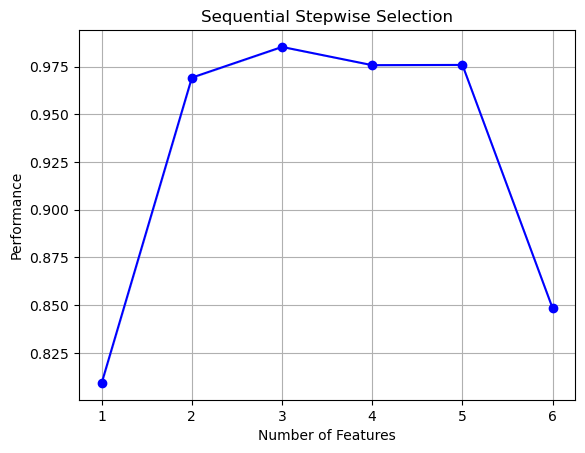

('amount', 'oldbalanceOrg', 'newbalanceOrig')

In [73]:
#stepwoise selection
sffs = SFS(LinearRegression(),
         k_features=(2,6),
         forward=True,
         floating=True,
         scoring = 'roc_auc',
         cv=0)
sffs.fit(X_train, y_train)
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Stepwise Selection')
plt.grid()
plt.show()
sffs.k_feature_names_

In [74]:
#feature selection
new_X = X[['amount', 'oldbalanceOrg', 'newbalanceOrig']]
X_train, X_test, y_train, y_test = train_test_split(new_X, y, train_size = 0.8)

In [75]:
# normalizing data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

#getting libraries for different ml methods
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, log_loss

In [76]:
#logstic regression
lr = LogisticRegression(C = 1, penalty = 'l2', tol = 1e-4, solver = 'saga')
lr = lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
print("The accuracy of Logistic Regression prediction is", '{:.2%}'.format(accuracy_score(y_test, lr_predictions)))
print("The log loss of Logistic Regression prediction is", 
      '{:.2}'.format(log_loss(y_test, lr.predict_proba(X_test))))
print(classification_report(y_test, lr_predictions))
pd.crosstab(index = y_test,
            columns = lr_predictions,
            rownames = ['Actual'],
            colnames = ['Predicted'],
            margins = False)
print("The accuracy of Logistic Regression prediction is", '{:.6%}'.format(accuracy_score(y_test, lr_predictions)))

The accuracy of Logistic Regression prediction is 85.33%
The log loss of Logistic Regression prediction is 0.37
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1716
           1       0.98      0.71      0.82      1570

    accuracy                           0.85      3286
   macro avg       0.88      0.85      0.85      3286
weighted avg       0.88      0.85      0.85      3286

The accuracy of Logistic Regression prediction is 85.331710%


C:\Users\Qixuan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [77]:
pd.crosstab(index = y_test,
            columns = lr_predictions,
            rownames = ['Actual'],
            colnames = ['Predicted'],
            margins = False)

Predicted,0,1
Actual,,
0,1689,27
1,455,1115


In [78]:
#svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [1,2,3,4,5], #regularizaiton
              'gamma': ['scale','auto'],
              'kernel': ['rbf','sigmoid','poly'],
              'degree': [1,2,3]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.846 total time=   1.6s
[CV 2/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.853 total time=   1.6s
[CV 3/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.850 total time=   1.6s
[CV 4/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.838 total time=   1.7s
[CV 5/5] END C=1, degree=1, gamma=scale, kernel=rbf;, score=0.854 total time=   1.7s
[CV 1/5] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.690 total time=   1.5s
[CV 2/5] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.689 total time=   1.3s
[CV 3/5] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.684 total time=   1.6s
[CV 4/5] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.673 total time=   1.6s
[CV 5/5] END C=1, degree=1, gamma=scale, kernel=sigmoid;, score=0.686 total time=   1.3s
[CV 1/5] END C=1, degree=1, gamma=scale, kernel=poly;, score=0.824 t

[CV 1/5] END C=2, degree=1, gamma=scale, kernel=sigmoid;, score=0.690 total time=   1.5s
[CV 2/5] END C=2, degree=1, gamma=scale, kernel=sigmoid;, score=0.688 total time=   1.3s
[CV 3/5] END C=2, degree=1, gamma=scale, kernel=sigmoid;, score=0.684 total time=   1.6s
[CV 4/5] END C=2, degree=1, gamma=scale, kernel=sigmoid;, score=0.673 total time=   1.4s
[CV 5/5] END C=2, degree=1, gamma=scale, kernel=sigmoid;, score=0.686 total time=   1.3s
[CV 1/5] END C=2, degree=1, gamma=scale, kernel=poly;, score=0.843 total time=   1.2s
[CV 2/5] END C=2, degree=1, gamma=scale, kernel=poly;, score=0.852 total time=   1.1s
[CV 3/5] END C=2, degree=1, gamma=scale, kernel=poly;, score=0.847 total time=   1.0s
[CV 4/5] END C=2, degree=1, gamma=scale, kernel=poly;, score=0.835 total time=   1.1s
[CV 5/5] END C=2, degree=1, gamma=scale, kernel=poly;, score=0.852 total time=   1.1s
[CV 1/5] END C=2, degree=1, gamma=auto, kernel=rbf;, score=0.863 total time=   1.4s
[CV 2/5] END C=2, degree=1, gamma=auto, k

[CV 1/5] END C=3, degree=1, gamma=scale, kernel=poly;, score=0.852 total time=   1.1s
[CV 2/5] END C=3, degree=1, gamma=scale, kernel=poly;, score=0.863 total time=   1.1s
[CV 3/5] END C=3, degree=1, gamma=scale, kernel=poly;, score=0.858 total time=   0.9s
[CV 4/5] END C=3, degree=1, gamma=scale, kernel=poly;, score=0.843 total time=   1.1s
[CV 5/5] END C=3, degree=1, gamma=scale, kernel=poly;, score=0.860 total time=   1.1s
[CV 1/5] END C=3, degree=1, gamma=auto, kernel=rbf;, score=0.873 total time=   1.3s
[CV 2/5] END C=3, degree=1, gamma=auto, kernel=rbf;, score=0.885 total time=   1.3s
[CV 3/5] END C=3, degree=1, gamma=auto, kernel=rbf;, score=0.879 total time=   1.3s
[CV 4/5] END C=3, degree=1, gamma=auto, kernel=rbf;, score=0.863 total time=   1.3s
[CV 5/5] END C=3, degree=1, gamma=auto, kernel=rbf;, score=0.880 total time=   1.3s
[CV 1/5] END C=3, degree=1, gamma=auto, kernel=sigmoid;, score=0.691 total time=   1.4s
[CV 2/5] END C=3, degree=1, gamma=auto, kernel=sigmoid;, score

[CV 2/5] END C=4, degree=1, gamma=auto, kernel=rbf;, score=0.889 total time=   1.3s
[CV 3/5] END C=4, degree=1, gamma=auto, kernel=rbf;, score=0.882 total time=   1.3s
[CV 4/5] END C=4, degree=1, gamma=auto, kernel=rbf;, score=0.868 total time=   1.2s
[CV 5/5] END C=4, degree=1, gamma=auto, kernel=rbf;, score=0.885 total time=   1.3s
[CV 1/5] END C=4, degree=1, gamma=auto, kernel=sigmoid;, score=0.691 total time=   1.4s
[CV 2/5] END C=4, degree=1, gamma=auto, kernel=sigmoid;, score=0.688 total time=   1.3s
[CV 3/5] END C=4, degree=1, gamma=auto, kernel=sigmoid;, score=0.684 total time=   1.5s
[CV 4/5] END C=4, degree=1, gamma=auto, kernel=sigmoid;, score=0.674 total time=   1.5s
[CV 5/5] END C=4, degree=1, gamma=auto, kernel=sigmoid;, score=0.688 total time=   1.3s
[CV 1/5] END C=4, degree=1, gamma=auto, kernel=poly;, score=0.858 total time=   1.1s
[CV 2/5] END C=4, degree=1, gamma=auto, kernel=poly;, score=0.869 total time=   1.2s
[CV 3/5] END C=4, degree=1, gamma=auto, kernel=poly;, 

[CV 3/5] END C=5, degree=1, gamma=auto, kernel=sigmoid;, score=0.684 total time=   1.5s
[CV 4/5] END C=5, degree=1, gamma=auto, kernel=sigmoid;, score=0.674 total time=   1.3s
[CV 5/5] END C=5, degree=1, gamma=auto, kernel=sigmoid;, score=0.687 total time=   1.3s
[CV 1/5] END C=5, degree=1, gamma=auto, kernel=poly;, score=0.862 total time=   1.1s
[CV 2/5] END C=5, degree=1, gamma=auto, kernel=poly;, score=0.877 total time=   1.1s
[CV 3/5] END C=5, degree=1, gamma=auto, kernel=poly;, score=0.871 total time=   0.9s
[CV 4/5] END C=5, degree=1, gamma=auto, kernel=poly;, score=0.851 total time=   1.0s
[CV 5/5] END C=5, degree=1, gamma=auto, kernel=poly;, score=0.872 total time=   1.0s
[CV 1/5] END C=5, degree=2, gamma=scale, kernel=rbf;, score=0.882 total time=   1.2s
[CV 2/5] END C=5, degree=2, gamma=scale, kernel=rbf;, score=0.892 total time=   1.2s
[CV 3/5] END C=5, degree=2, gamma=scale, kernel=rbf;, score=0.884 total time=   1.2s
[CV 4/5] END C=5, degree=2, gamma=scale, kernel=rbf;, sc

[[1663   53]
 [ 299 1271]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1716
           1       0.96      0.81      0.88      1570

    accuracy                           0.89      3286
   macro avg       0.90      0.89      0.89      3286
weighted avg       0.90      0.89      0.89      3286

[[1663   53]
 [ 299 1271]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1716
           1       0.96      0.81      0.88      1570

    accuracy                           0.89      3286
   macro avg       0.90      0.89      0.89      3286
weighted avg       0.90      0.89      0.89      3286

The accuracy of SVM prediction is 89.287888%


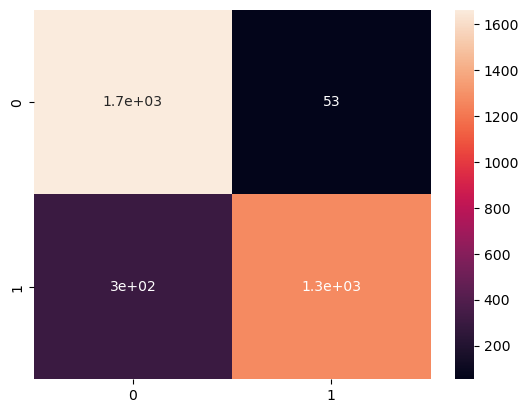

In [80]:
# Radial basis function kernel:
from sklearn.metrics import confusion_matrix
rbf_svc = SVC(C= 5, degree= 1, gamma='scale', kernel = 'rbf')
rbf_svc.fit(X_train, y_train)
rbf_pred = rbf_svc.predict(X_test)

print(confusion_matrix(y_test, rbf_pred))
print(classification_report(y_test, rbf_pred))

rbf_cm = confusion_matrix(y_test, rbf_pred)
sns.heatmap(rbf_cm,annot=True)
plt.savefig('confusion_Matrix.png')
print(rbf_cm)

# accuracy report:
accuracy_score(y_test,rbf_pred)
print(classification_report(y_test, rbf_pred))

print("The accuracy of SVM prediction is", '{:.6%}'.format(accuracy_score(y_test, rbf_pred)))